Solution converged after 2 iterations.


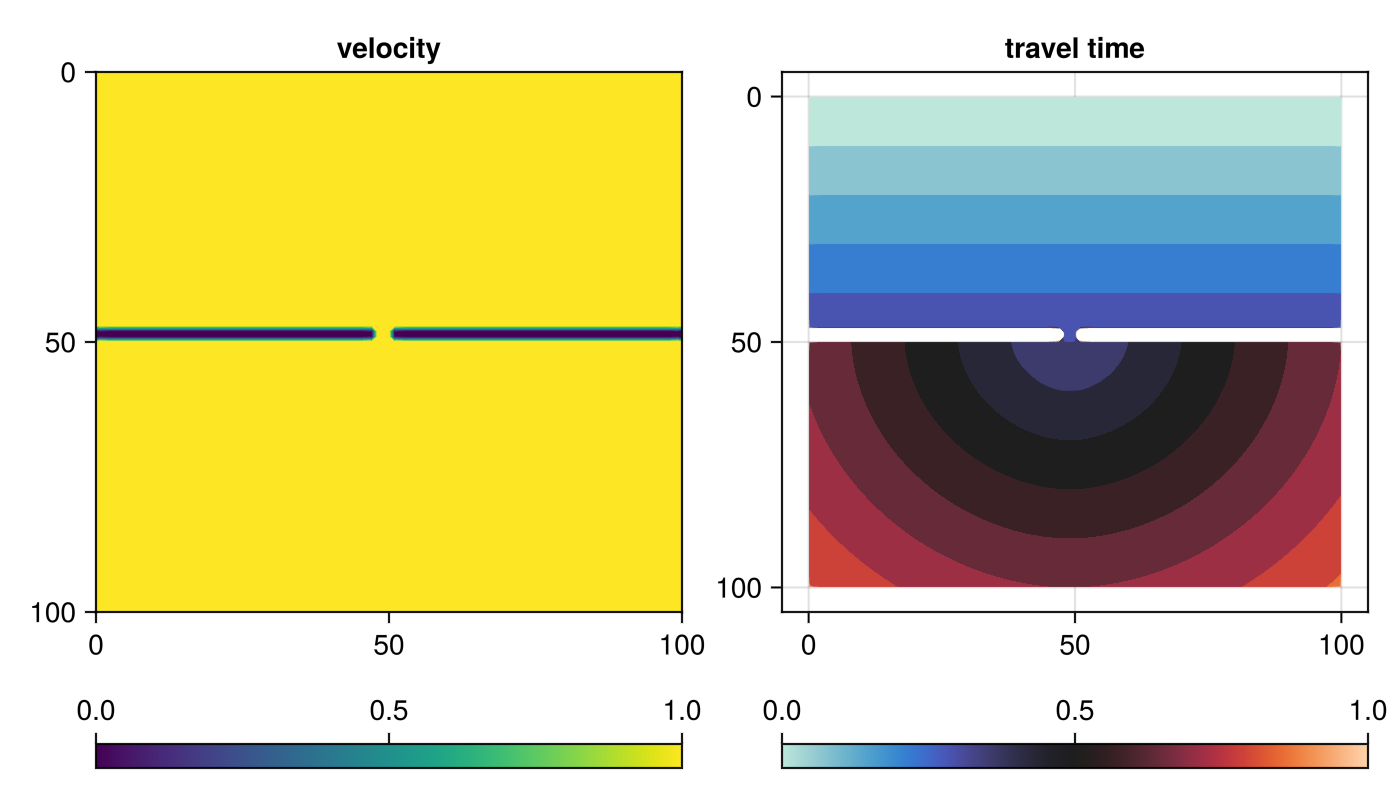

GLMakie.Screen(...)

In [1]:
using WaveFront
using GLMakie

x_coords = 0:1:100;
y_coords = 0:1:100;

# constant velocity
velocity = zeros(length(x_coords), length(y_coords)) .+ 1;

# add low velocity barriers
velocity[begin:48, 49:50] .= 0.001;
velocity[52:end,   49:50] .= 0.001;

grid = Grid2D(x_coords, y_coords, velocity);

# distribute sources 
sources = [(x, 0.0) for x in x_coords];

# calculate travel times
tt = fast_sweeping(grid, sources, verbose=true);

# plot 
Makie.inline!(true)
fig = Figure(size=(700,400)) 

ax1 = Axis(fig[1,1], title="velocity", yreversed=true)
contourf!(ax1, x_coords, y_coords, velocity)
Colorbar(fig[2,1], vertical=false)

ax2 = Axis(fig[1,2], title="travel time", yreversed=true)
contourf!(ax2, x_coords, y_coords, tt, colormap=:seaborn_icefire_gradient, levels = 0:10:150)
Colorbar(fig[2,2], vertical=false, colormap=:seaborn_icefire_gradient)

display(fig)
